# Importing modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import time
import random
import math
from IPython.display import clear_output

# Importing own code

In [2]:
from generateSpace import *
from plotLattice import *
from getTriangleLengths import *
from potentialEnergyPerTrio import *
from potentialEnergy import *
from potentialEnergyPerParticle import *
from numberOfCalculations import *
from makeRandomDatabase import *

## Auxiliarycode

In [3]:
def return1(lengths):
    return 1

def predictedCalculationTime(numberOfSurroundingCells, numberOfParticlesPerCell = 4, timePerTriangle = 15*(10**-6)):
    
    return timePerTriangle * numberOfCalculationsGeneration(numberOfSurroundingCells, numberOfParticlesPerCell)

predictedCalculationTime(4, 4)

3.0912599999999997

# Testing

## Testing functionality

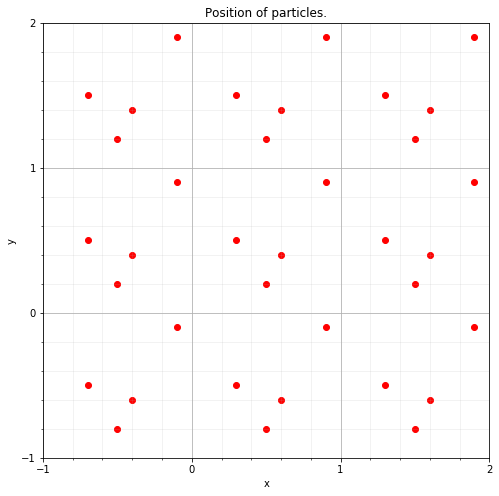

11486539.900954507

In [4]:
atoms = [np.array([0.3, 0.5]), np.array([0.9, 0.9]), np.array([0.6, 0.4]), np.array([0.5, 0.2])]

totalSpace = generateSpace(atoms, 1, 1.0, False)
plotLattice(totalSpace)

otherSpace = generateSpace(atoms, 1, 1.0)

potentialEnergy(otherSpace, atoms, potentialEnergyPerTrio)

In [5]:
potentialEnergy(generateSpace(atoms, 4, 1.0), atoms, return1)# Results from wolfram are 206084

206084

## Testing quality of potential energy particle

In [6]:
def potentialEnergyPerTrioExperimental(lengths, E0=1, Rc=1):
    """
    """
    Mc = 27*np.sqrt(3)
    A0 = 72301961339136
    
    a = Mc * lengths[0] / Rc
    b = Mc * lengths[1] / Rc
    c = Mc * lengths[2] / Rc
    
    #s = (a + b + c) / 2
    #area2Triangle = s * (s - a) * (s - b) * (s - c)
    
    shortRangePotential = (a**-8 + b**-8 + c**-8)
    longRangePotential = -((a + b + c)**-6)
    
    return E0 * A0 * (shortRangePotential + longRangePotential)

-0.9999556508296936
-0.0021701388888888916


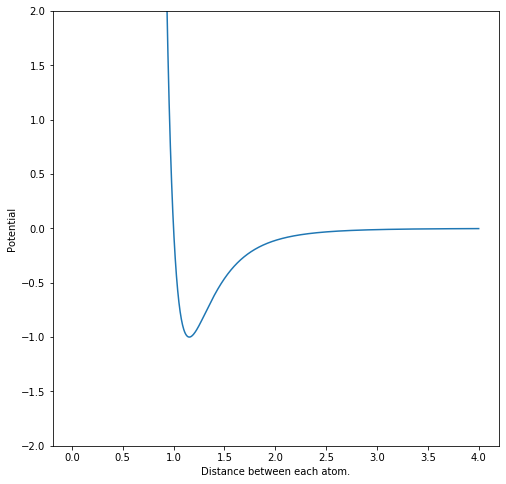

In [7]:
yCoordinates = np.linspace(0.01, 4, 1000, endpoint=True)

results =[]

for yCoordinate in yCoordinates:
    results.append(potentialEnergyPerTrioExperimental([yCoordinate, yCoordinate, yCoordinate]))

fig, ax = plt.subplots(figsize=(8, 8))
plt.ylim(-2, 2)
ax.plot(yCoordinates, results)
ax.set_xlabel('Distance between each atom.')
ax.set_ylabel('Potential')
print(min(results))
print(potentialEnergyPerTrioExperimental([max(yCoordinates), max(yCoordinates), max(yCoordinates)]))

20719.01711479884
716093.9635266006


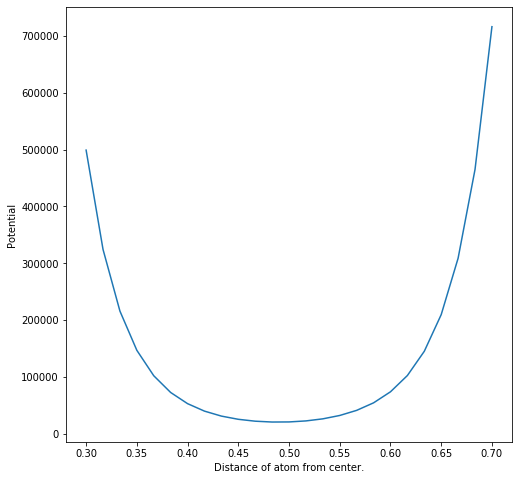

In [8]:
widthOfCell = 2
yCoordinates = np.linspace(0.3*widthOfCell/2, 0.7*widthOfCell/2, 25, endpoint=True)

results =[]

for yCoordinate in yCoordinates:
    particles = [np.array([widthOfCell / 2 + yCoordinate, widthOfCell / 2 + yCoordinate]), np.array([widthOfCell / 2 + yCoordinate, widthOfCell / 2 - yCoordinate]), np.array([widthOfCell / 2 - yCoordinate, widthOfCell / 2 + yCoordinate]), np.array([widthOfCell / 2 - yCoordinate, widthOfCell / 2 - yCoordinate])]
    otherSpace = generateSpace(particles, 4, widthOfCell)
    results.append(potentialEnergy(otherSpace, particles, potentialEnergyPerTrioExperimental))

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(yCoordinates, results)
ax.set_xlabel('Distance of atom from center.')
ax.set_ylabel('Potential')
print(min(results))
print(max(results))

## Checking convergence

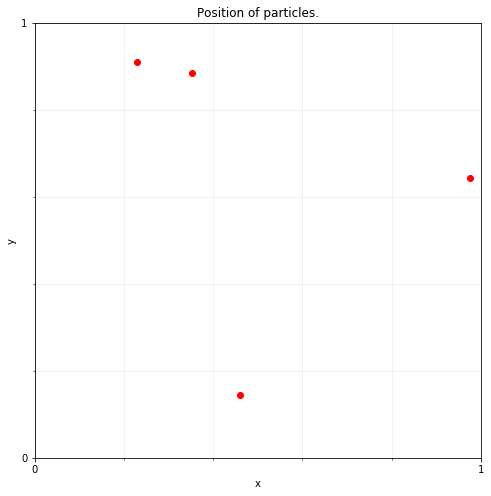

26353851.156751506
96901041.69774042
102566137.04293944
104129350.06900665
104773615.77279982
105100227.07653227
105288354.51715907
105406560.77924554
105485675.62601523


"\nfig, ax = plt.subplots(figsize=(8, 8))\nax.plot(numberOfSurroundingCells, timeForCalculation)\nax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')\nax.set_xlabel('Number of surrounding cells')\nax.set_ylabel('Time needed for the calculation (seconds)')"

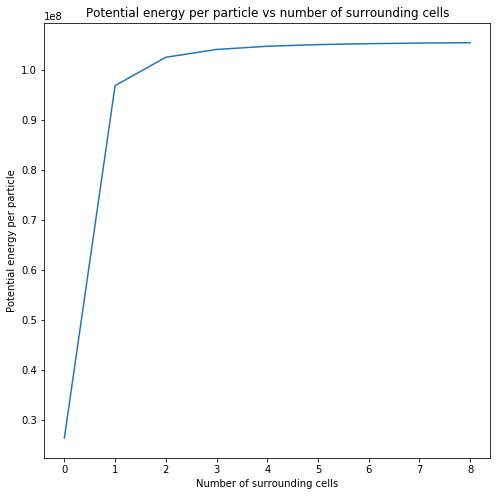

In [9]:
numberOfSurroundingCells = [i for i in range(0,9)]

potentialEnergyResults = []
timeForCalculation = []

widthOfCell = 1.0

atoms = [np.array([random.uniform(0, widthOfCell), random.uniform(0, widthOfCell)]) for j in range(0, 4)]

plotLattice(atoms, widthOfCell)

for i in numberOfSurroundingCells:
    #print('Calculating with ' + str(i) + ' surrounding cells.')
    
    space = generateSpace(atoms, i, widthOfCell)
    
    timeStart = time.time()
    potentialEnergyResults.append(potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrioExperimental))
    timeEnd = time.time()
    #print((timeEnd - timeStart))
    timeForCalculation.append((timeEnd - timeStart))
    
[print(i) for i in potentialEnergyResults]

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, potentialEnergyResults)
ax.set_title('Potential energy per particle vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Potential energy per particle')

"""
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, timeForCalculation)
ax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time needed for the calculation (seconds)')"""

Using the standard lattice
270848.7201783403
1008747.7457418067
1068450.3900404095
1084960.7190760903
1091773.3691106904
1095230.187252084
1097222.9035127393
1098475.9282984738
1099315.1772263858


"\nfig, ax = plt.subplots(figsize=(8, 8))\nax.plot(numberOfSurroundingCells, timeForCalculation)\nax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')\nax.set_xlabel('Number of surrounding cells')\nax.set_ylabel('Time needed for the calculation (seconds)')"

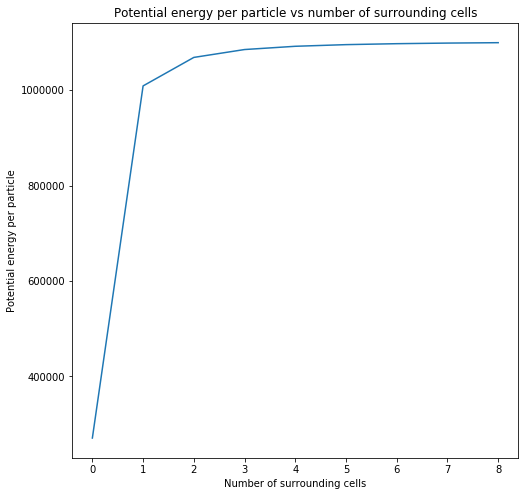

In [10]:
numberOfSurroundingCells = [i for i in range(0, 9)]

potentialEnergyResults = []
timeForCalculation = []

widthOfCell = 1.0

atoms = [widthOfCell * np.array([0.3, 0.5]), widthOfCell * np.array([0.9, 0.9]), widthOfCell * np.array([0.6, 0.4]), widthOfCell * np.array([0.5, 0.2])]

print('Using the standard lattice')#plotLattice(atoms)

for i in numberOfSurroundingCells:
    #print('Calculating with ' + str(i) + ' surrounding cells.')
    
    space = generateSpace(atoms, i, widthOfCell)
    
    timeStart = time.time()
    potentialEnergyResults.append(potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrioExperimental))
    timeEnd = time.time()
    #print((timeEnd - timeStart))
    timeForCalculation.append((timeEnd - timeStart))
    
[print(i) for i in potentialEnergyResults]

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, potentialEnergyResults)
ax.set_title('Potential energy per particle vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Potential energy per particle')

"""
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, timeForCalculation)
ax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time needed for the calculation (seconds)')"""

Using the standard lattice
1017.2818387538111
3928.9165904898528
4169.013025604693
4235.698937337703
4263.252393119126
4277.241110602808
4285.307147384282
4290.3797258327695
4293.77741252725


"\nfig, ax = plt.subplots(figsize=(8, 8))\nax.plot(numberOfSurroundingCells, timeForCalculation)\nax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')\nax.set_xlabel('Number of surrounding cells')\nax.set_ylabel('Time needed for the calculation (seconds)')"

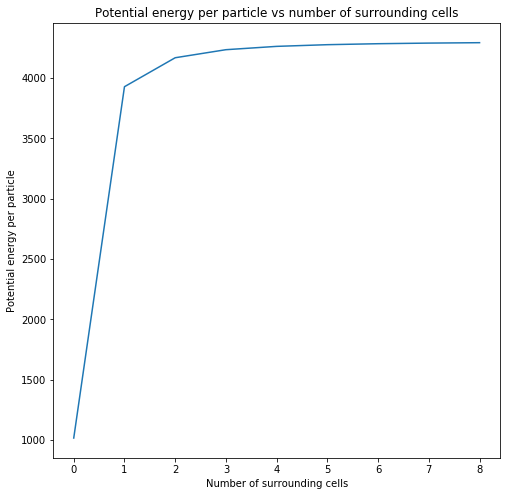

In [11]:
numberOfSurroundingCells = [i for i in range(0, 9)]

potentialEnergyResults = []
timeForCalculation = []

widthOfCell = 2.0

atoms = [widthOfCell * np.array([0.3, 0.5]), widthOfCell * np.array([0.9, 0.9]), widthOfCell * np.array([0.6, 0.4]), widthOfCell * np.array([0.5, 0.2])]

print('Using the standard lattice')#plotLattice(atoms)

for i in numberOfSurroundingCells:
    #print('Calculating with ' + str(i) + ' surrounding cells.')
    
    space = generateSpace(atoms, i, widthOfCell)
    
    timeStart = time.time()
    potentialEnergyResults.append(potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrioExperimental))
    timeEnd = time.time()
    #print((timeEnd - timeStart))
    timeForCalculation.append((timeEnd - timeStart))
    
[print(i) for i in potentialEnergyResults]

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, potentialEnergyResults)
ax.set_title('Potential energy per particle vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Potential energy per particle')

"""
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, timeForCalculation)
ax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time needed for the calculation (seconds)')"""

Using the standard lattice
3.3374919569628436
15.167575879818422
16.212999154851765
16.507747855956076
16.630090129846867
16.692319832810753
16.728233865369692
16.75082909960431
16.765966478404703


"\nfig, ax = plt.subplots(figsize=(8, 8))\nax.plot(numberOfSurroundingCells, timeForCalculation)\nax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')\nax.set_xlabel('Number of surrounding cells')\nax.set_ylabel('Time needed for the calculation (seconds)')"

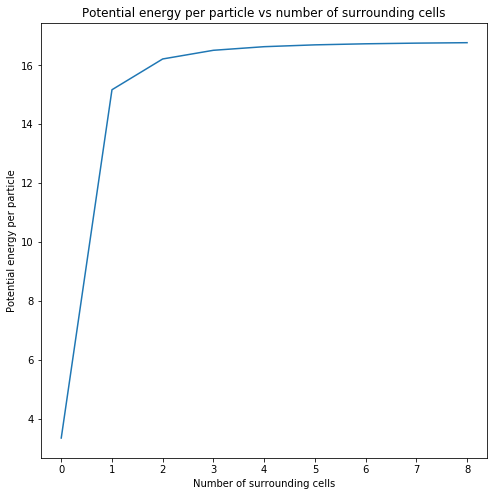

In [12]:
numberOfSurroundingCells = [i for i in range(0, 9)]

potentialEnergyResults = []
timeForCalculation = []

widthOfCell = 4.0

atoms = [widthOfCell * np.array([0.3, 0.5]), widthOfCell * np.array([0.9, 0.9]), widthOfCell * np.array([0.6, 0.4]), widthOfCell * np.array([0.5, 0.2])]

print('Using the standard lattice')#plotLattice(atoms)

for i in numberOfSurroundingCells:
    #print('Calculating with ' + str(i) + ' surrounding cells.')
    
    space = generateSpace(atoms, i, widthOfCell)
    
    timeStart = time.time()
    potentialEnergyResults.append(potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrioExperimental))
    timeEnd = time.time()
    #print((timeEnd - timeStart))
    timeForCalculation.append((timeEnd - timeStart))
    
[print(i) for i in potentialEnergyResults]

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, potentialEnergyResults)
ax.set_title('Potential energy per particle vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Potential energy per particle')

"""
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, timeForCalculation)
ax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time needed for the calculation (seconds)')"""

Using the standard lattice
0.003095433805804376
0.05643967840893793
0.062203778317131135
0.06389040384327462
0.06459817190136184
0.06495979223002718
0.06516892636316686
0.06530063391362374
0.06538890750504305


"\nfig, ax = plt.subplots(figsize=(8, 8))\nax.plot(numberOfSurroundingCells, timeForCalculation)\nax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')\nax.set_xlabel('Number of surrounding cells')\nax.set_ylabel('Time needed for the calculation (seconds)')"

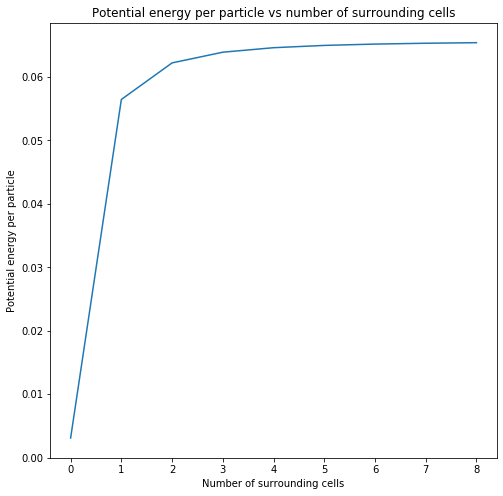

In [13]:
numberOfSurroundingCells = [i for i in range(0, 9)]

potentialEnergyResults = []
timeForCalculation = []

widthOfCell = 8.0

atoms = [widthOfCell * np.array([0.3, 0.5]), widthOfCell * np.array([0.9, 0.9]), widthOfCell * np.array([0.6, 0.4]), widthOfCell * np.array([0.5, 0.2])]

print('Using the standard lattice')#plotLattice(atoms)

for i in numberOfSurroundingCells:
    #print('Calculating with ' + str(i) + ' surrounding cells.')
    
    space = generateSpace(atoms, i, widthOfCell)
    
    timeStart = time.time()
    potentialEnergyResults.append(potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrioExperimental))
    timeEnd = time.time()
    #print((timeEnd - timeStart))
    timeForCalculation.append((timeEnd - timeStart))
    
[print(i) for i in potentialEnergyResults]

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, potentialEnergyResults)
ax.set_title('Potential energy per particle vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Potential energy per particle')

"""
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(numberOfSurroundingCells, timeForCalculation)
ax.set_title('Time needed for the calculation (seconds) vs number of surrounding cells')
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time needed for the calculation (seconds)')"""

## Testing and predicting fucntion speed

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1.9989013671875e-06, 8.006572723388672e-05, 0.0002300295829772949, 0.00046010351181030275, 0.0007721729278564453, 0.0011492691040039063, 0.0016163620948791504, 0.0021525378227233885, 0.002760640621185303, 0.0034809441566467287, 0.004221958637237549]


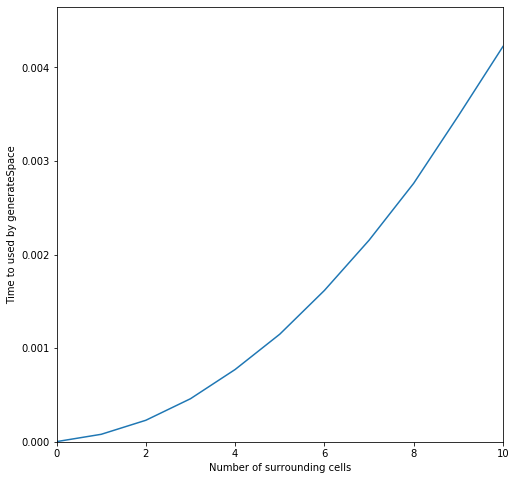

In [14]:
numberOfMeasurements = 500

xVariable = [i for i in range(0, 11)]
yVariable =[]

for i in xVariable:
    timeStart = time.time()
    [generateSpace(atoms, i, 1.0) for j in range(numberOfMeasurements)]
    timeEnd = time.time()
    yVariable.append((timeEnd - timeStart)/numberOfMeasurements)
    
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(xVariable, yVariable)
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time to used by generateSpace')
ax.set_xlim([min(xVariable), max(xVariable)])
ax.set_ylim([0, 1.1 * max(yVariable)])

print(xVariable)
print(yVariable)

In [15]:
%timeit potentialEnergyPerTrio(getTriangleLengths(np.array([0.3, 0.5]), np.array([0.9, 0.9]), np.array([0.6, 0.4])))

19.6 µs ± 145 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Calculating with 0 surrounding cells.
0.00033291180928548175
Calculating with 1 surrounding cells.
0.04051566123962402
Calculating with 2 surrounding cells.
0.2979137102762858
Calculating with 3 surrounding cells.
1.163832187652588
Calculating with 4 surrounding cells.
3.2784887154897056
Calculating with 5 surrounding cells.
7.294430096944173
Calculating with 6 surrounding cells.
14.173768440882364
Calculating with 7 surrounding cells.
25.37612970670064
Calculating with 8 surrounding cells.
42.296455224355064
Calculating with 9 surrounding cells.
65.16844097773235
Calculating with 10 surrounding cells.
97.87086304028828

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0.00033291180928548175, 0.04051566123962402, 0.2979137102762858, 1.163832187652588, 3.2784887154897056, 7.294430096944173, 14.173768440882364, 25.37612970670064, 42.296455224355064, 65.16844097773235, 97.87086304028828]
[5.9999999999999995e-05, 0.0327, 0.2823, 1.1175, 3.0912599999999997, 6.94086, 13.5879, 24.138299999999997, 39.88229

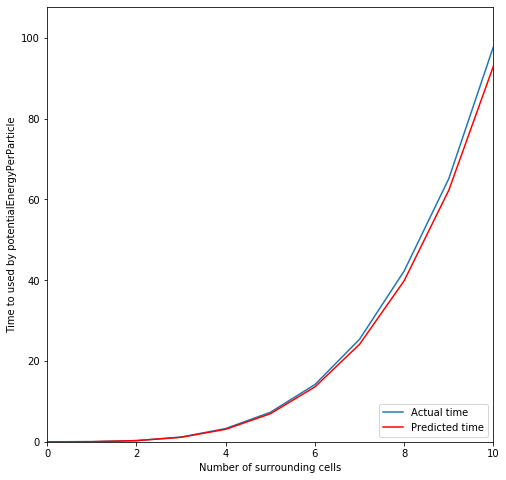

In [16]:
numberOfMeasurements = 3

atoms = [np.array([random.uniform(0, 5.0), random.uniform(0, 5.0)]) for j in range(0, 4)]

xVariable = [i for i in range(0, 11)]
yVariable =[]

for i in xVariable:
    print('Calculating with ' + str(i) + ' surrounding cells.')
    space = generateSpace(atoms, i, 1.0)
    timeStart = time.time()
    [potentialEnergyPerParticle(space, atoms, potentialEnergyPerTrio) for j in range(numberOfMeasurements)]
    timeEnd = time.time()
    print((timeEnd - timeStart)/numberOfMeasurements)
    yVariable.append((timeEnd - timeStart)/numberOfMeasurements)

print('')
yVariablePredict = [predictedCalculationTime(i, len(atoms)) for i in xVariable]

fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(xVariable, yVariable)
ax.plot(xVariable, yVariablePredict, c='r')
plt.legend(['Actual time', 'Predicted time' ], loc=4)
ax.set_xlabel('Number of surrounding cells')
ax.set_ylabel('Time to used by potentialEnergyPerParticle')
ax.set_xlim([min(xVariable), max(xVariable)])
ax.set_ylim([0, 1.1 * max(yVariable)])

print(xVariable)
print(yVariable)
print(yVariablePredict)

In [17]:
def test(listVectors):
    vectorA = listVectors[0]
    vectorB = listVectors[1]
    diffrences = vectorA - vectorB
    sum = math.pow(diffrences.dot(diffrences), -1)
    

%timeit test([np.array([1, 0]), np.array([1.0, 2])])

5.26 µs ± 28.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
